# Imports

In [1]:
import math

import torch
import pandas as pd
from transformers import BartTokenizer, PreTrainedTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

from model import Transformer, TransformerConfig
from utils import translate
from monkeypatch import patch_and_get_attn

# Load model and tokenizer

In [2]:
lit_ckpt_path = "lightning_logs/version_6/checkpoints/epoch=14-step=116382.ckpt"
tokenizer_path = "pretrained_tokenizers/bart_bpe_opus_en_id_30000"

# load model from pytorch lightning ckpt
ckpt = torch.load(lit_ckpt_path, map_location="cpu")
model_state_dict = {k[6:]: v for k, v in ckpt["state_dict"].items()}  # omit "model."
transformer_cfg = TransformerConfig(
    n_encoders=6,
    n_decoders=6,
    vocab_sz=30000,
    emb_sz=512,
    ff_sz=512 * 4,
    n_heads=8,
    head_sz=512 // 8,
    pdrop=0.1,
)
model = Transformer(transformer_cfg).cuda().eval()
model.load_state_dict(model_state_dict)

# load tokenizer
tokenizer = BartTokenizer.from_pretrained(tokenizer_path)

In [3]:
# pandas setting to make output nicer
pd.set_option("display.max_colwidth", None)

# comment out to start with fresh seed
torch.manual_seed(0)

# Translate!

In [4]:
# I use chatgpt to generate samples
SIMPLE_TEXTS = [
    "The cat sat on the mat.",
    "I have a red ball.",
    "The sun is shining.",
    "Birds can fly in the sky.",
    "Mom bakes yummy cookies.",
    "My teddy bear is so cuddly.",
    "The frog jumped into the pond.",
    "We plant seeds in the soil.",
    "The big tree gives us shade.",
    "Let's read a fun story together.",
]

# temperature (t) settings:
# < 1  =  more accurate
# > 1  =  more creative (kinda dumb tbh)
simple_low_temp = translate(model, tokenizer, max_gen_length=128, text=SIMPLE_TEXTS, t=0.3)
simple_high_temp = translate(model, tokenizer, max_gen_length=128, text=SIMPLE_TEXTS, t=1.2)

df_simple = pd.DataFrame({
    "English": SIMPLE_TEXTS,
    "Indonesian (t=low)": simple_low_temp,
    "Indonesian (t=high)": simple_high_temp,
})
df_simple

,English,Indonesian (t=low),Indonesian (t=high)
0,The cat sat on the mat.,Kucing duduk di atas matras.,ketika menemui kucing itu untuk sebuah melainkan terputus.
1,I have a red ball.,Aku punya bola merah.,Aku dapat bola merah.
2,The sun is shining.,Matahari bersinar.,Matahari bersinar.
3,Birds can fly in the sky.,Burung bisa terbang di langit.,Runcangan dapat terbang di langit.
4,Mom bakes yummy cookies.,Mom bakes yumi kue.,Mom bakes y tangan.
5,My teddy bear is so cuddly.,Beruang Bantengku sangat marah.,itasuoLagipula begitu mintaasnya vaksin.
6,The frog jumped into the pond.,Gudang melompat ke dalam kolam.,Sampaieaksinya ada di dalam kolamber dilempari.
7,We plant seeds in the soil.,Kita menanam biji-bijian di tanah.,Kita menanam biji-E padam di tanah.
8,The big tree gives us shade.,Pohon besar memberi kita warna.,Kami beruntung dalam kiamat.
9,Let's read a fun story together.,Mari kita baca cerita menyenangkan bersama.,Ket bercerita menyenangkan bersama-sama.


In [5]:
# I use chatgpt to generate samples
HARD_TEXTS = [
    "The phenomenon of quantum entanglement challenges classical notions of reality.",
    "The economic implications of globalization have sparked widespread debate.",
    "Shakespeare's intricate use of language adds layers of meaning to his plays.",
    "The principles of genetic engineering have revolutionized the field of biotechnology.",
    "The theory of relativity reshaped our understanding of space, time, and gravity.",
    "The ethical dilemma of artificial intelligence centers around its potential autonomy.",
    "Postmodern literature often blurs the line between fiction and reality.",
    "Inflation targeting has become a popular strategy for central banks in recent years.",
    "The psychological effects of childhood trauma can have far-reaching consequences in adulthood.",
    "Environmental sustainability requires a collective effort to mitigate climate change."
]

# temperature (t) settings:
# < 1  =  more accurate
# > 1  =  more creative (kinda dumb tbh)
hard_low_temp = translate(model, tokenizer, max_gen_length=128, text=HARD_TEXTS, t=0.3)
hard_high_temp = translate(model, tokenizer, max_gen_length=128, text=HARD_TEXTS, t=1.2)

df_hard = pd.DataFrame({
    "English": HARD_TEXTS,
    "Indonesian (t=low)": hard_low_temp,
    "Indonesian (t=high)": hard_high_temp,
})
df_hard

,English,Indonesian (t=low),Indonesian (t=high)
0,The phenomenon of quantum entanglement challenges classical notions of reality.,F daripada tantangan k k k kterbentuk tantangan kisaran kelas klasik.,F Memangan membentukENGA orangnya tet kukira IndonBesar cerutuwribato tentangalasan Limaanggilan matanya.
1,The economic implications of globalization have sparked widespread debate.,Nisi ekonomi dari globaliisasi telah memicu debat wida yang tidak jelas.,L roh ekonomiurocok subur itu telah
2,Shakespeare's intricate use of language adds layers of meaning to his plays.,Penyakit Shanda menggunakan bahasa adu adu berarti bagi permainannya.,Penyakit si ibu publik menggunakan baris bahasa hank panduan Antara inginkan dib utusan.
3,The principles of genetic engineering have revolutionized the field of biotechnology.,Prinsip dari teknik genetik telah telah mencapai bidang biotenologi biote.,Prinsip dari teknik genetik telah menghubungkan jauhnya secara bi pen kendali biote detik.
4,"The theory of relativity reshaped our understanding of space, time, and gravity.","Teori kitas dari kikitas yang memahami ruang, waktu, dan gravitasi.",TTT % restAstagaTeruskanka keepme ruang sebaiknya dan gravitasi.
5,The ethical dilemma of artificial intelligence centers around its potential autonomy.,Hasil etnis dari pusat intelijen buatan sekitar autonomi.,Kab sendiri Ro beritahu M jauh lebih besar dari informal.
6,Postmodern literature often blurs the line between fiction and reality.,Postmodern sastra sering berbaur antara fiksi dan kenyataan.,"Dia seringlo arwah dengan cahayaKhusus pamanku, katamu pesta perpisahan dengan bat Datang saat jangkaasaan menyuntikkan titik ajaib."
7,Inflation targeting has become a popular strategy for central banks in recent years.,Dalam bentuk yang terkini telah menjadi strategi populer untuk pusat bank dalam beberapa tahun terakhir.,Ini adalah:ancarkan negara utama dalam bankITA selama beberapa tahun.
8,The psychological effects of childhood trauma can have far-reaching consequences in adulthood.,Efek psikologis trauma masa kecilku bisa melakukan konsekuensi yang sangat besar.,Efek psikologis trauma hambatan masa depan bisa memperoleh banyak dunia dalam pidana penj memalukan.
9,Environmental sustainability requires a collective effort to mitigate climate change.,Seluruh kerangka lingkungan membutuhkan usaha untuk mengubah perubahan cuaca.,junior melakukankuat tetap saja usahasangat banyak untuk mengalian memelihara perubahan iklim.


# Attention visualization

In [6]:
def visualize_attn(
    model: Transformer,
    tokenizer: PreTrainedTokenizer,
    en_txt: str,
    id_txt: str,
    last_layer_only: bool = True,
):
    # get the attention (only supports batch size 1)
    en_ls, id_ls = [en_txt], [id_txt]
    device = next(model.parameters()).device
    ctx = tokenizer(text=en_ls, return_tensors="pt")
    tgt = tokenizer(text_target=id_ls, return_tensors="pt")
    model_inputs = {
        "ctx_input_ids": ctx["input_ids"],
        "ctx_pad_mask": ctx["attention_mask"],
        "tgt_input_ids": tgt["input_ids"],
        "tgt_pad_mask": tgt["attention_mask"],
    }
    model_inputs = {k: v.to(device) for k, v in model_inputs.items()}
    attn_dict = patch_and_get_attn(model, model_inputs)
    attn_dict = {k: v.squeeze(0) for k, v in attn_dict.items()}  # remove batch dim

    # visualize
    ctx_tokens = tokenizer.convert_ids_to_tokens(ctx["input_ids"][0])
    tgt_tokens = tokenizer.convert_ids_to_tokens(tgt["input_ids"][0])
    for k, v in attn_dict.items():
        # shorten the output
        if last_layer_only:
            if "encoder" in k and str(model.config.n_encoders - 1) not in k:
                continue
            if "decoder" in k and str(model.config.n_decoders - 1) not in k:
                continue
        # determine who's attending what
        if "vanilla" in k:
            query_tokens = ctx_tokens
            key_tokens = ctx_tokens
        elif "masked" in k:
            query_tokens = tgt_tokens
            key_tokens = tgt_tokens
        elif "cross" in k:
            query_tokens = tgt_tokens
            key_tokens = ctx_tokens
        else:
            assert False, "impossible case"
        n_heads = v.size(0)
        cols = 4
        rows = math.ceil(n_heads / cols)
        fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
        for i, (ax, head) in enumerate(zip(axs.flat, v), 1):
            sns.heatmap(head, xticklabels=1, yticklabels=1, cbar=False, ax=ax)
            ax.set_yticklabels(query_tokens, rotation=0)
            ax.set_xticklabels(key_tokens, rotation=90)
            ax.set_ylabel("query", fontweight="bold")
            ax.set_xlabel("key", fontweight="bold")
            ax.set_title(f"head_{i}")
        fig.suptitle(k, fontsize=14, fontweight="bold")
        fig.tight_layout()
        plt.show()

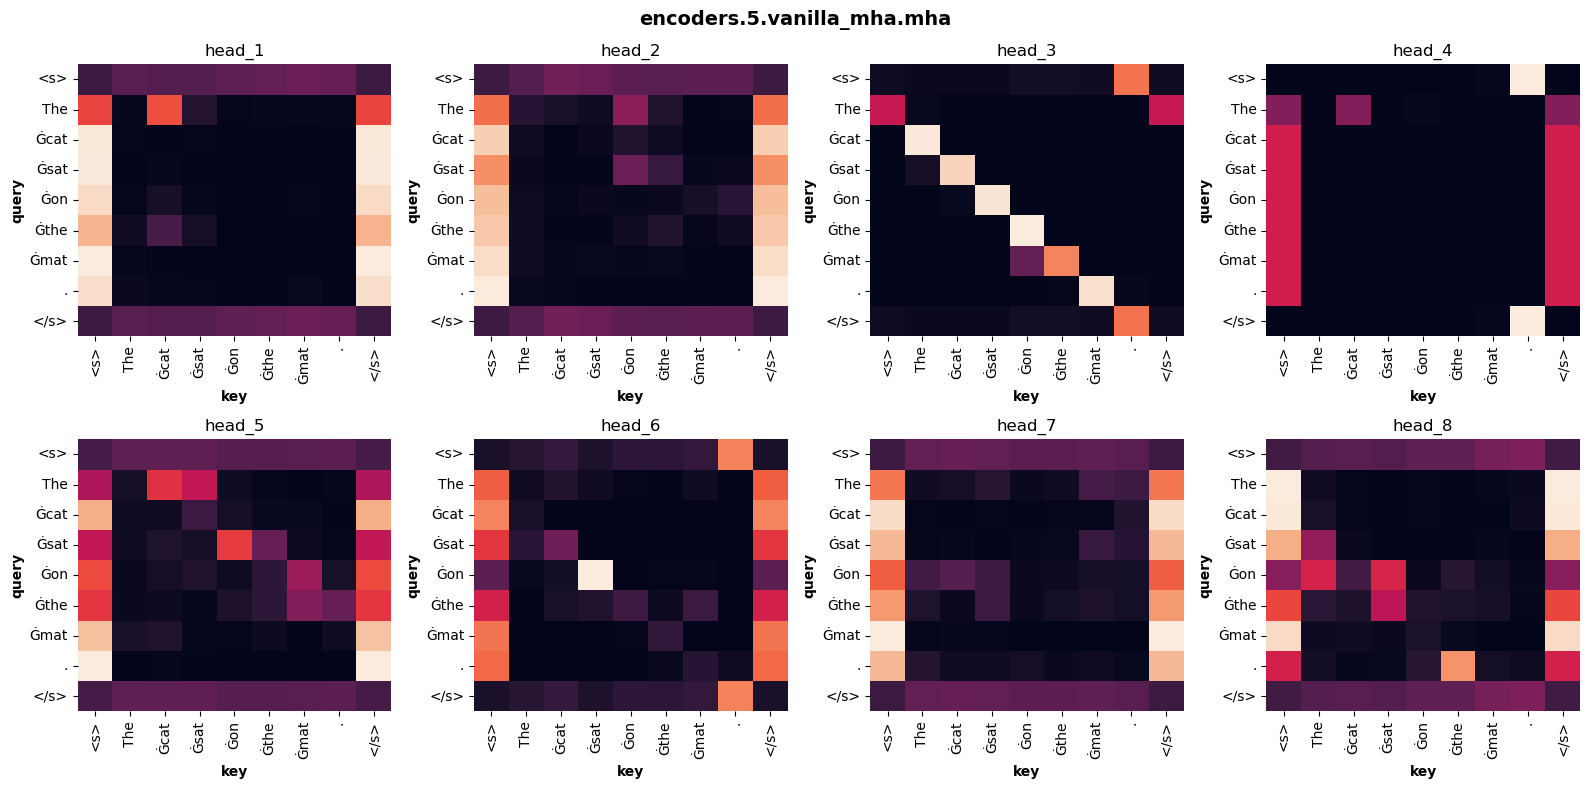

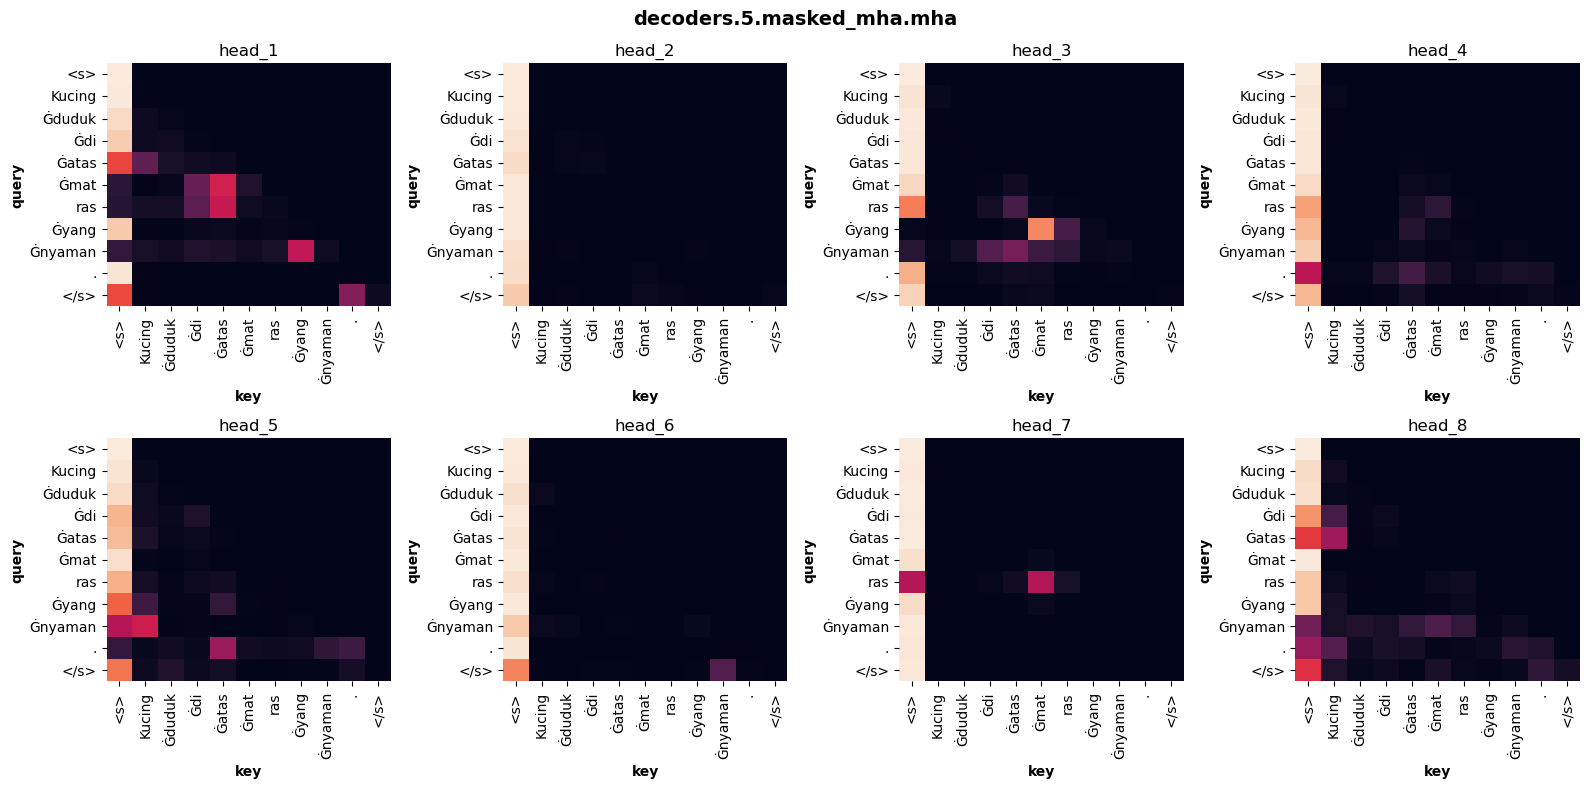

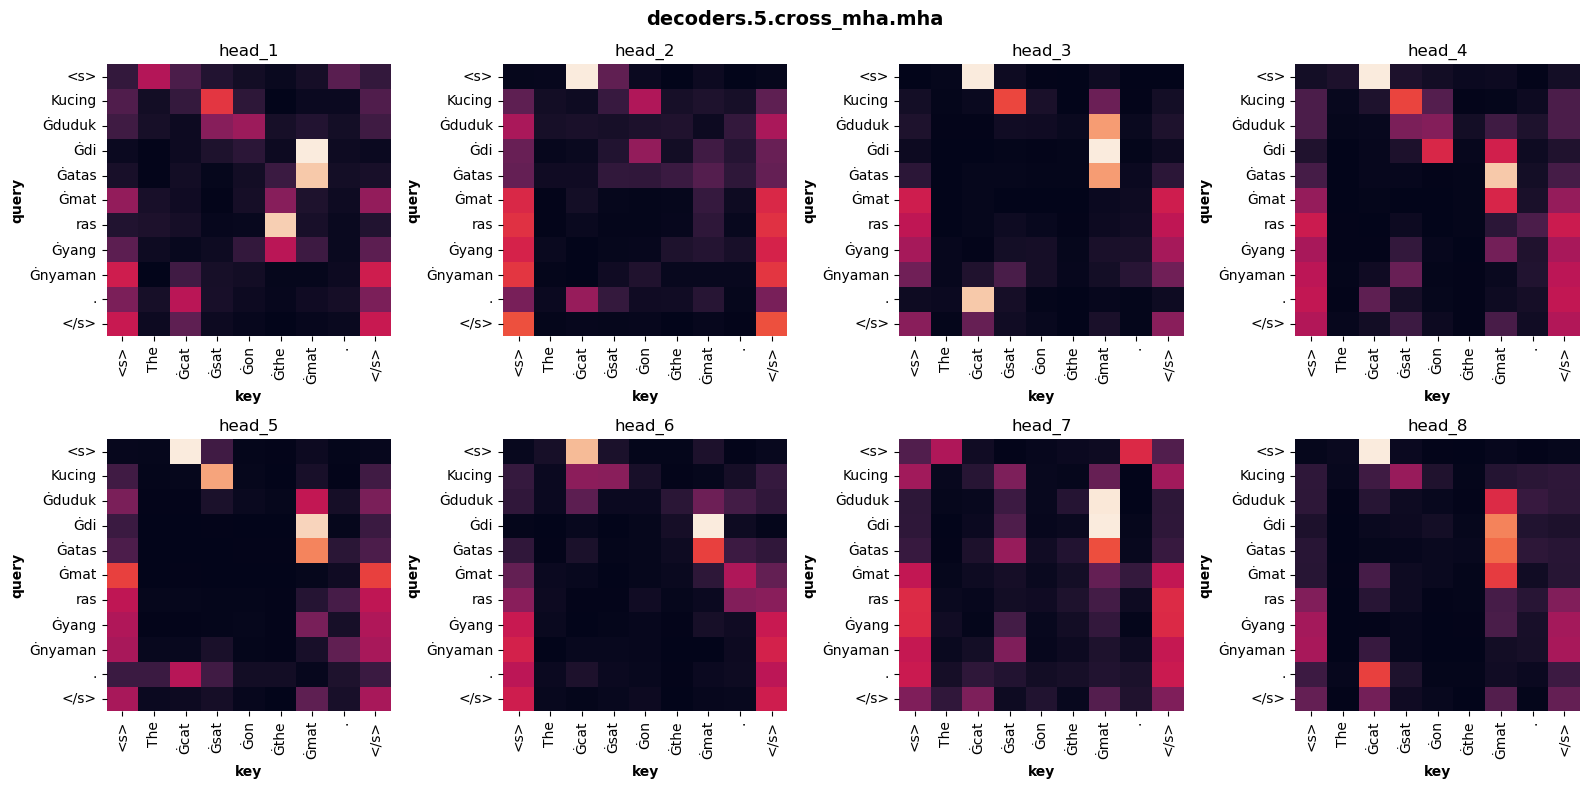

In [7]:
visualize_attn(
    model,
    tokenizer,
    en_txt="The cat sat on the mat.",
    id_txt="Kucing duduk di atas matras yang nyaman.",
    last_layer_only=True,  # set to False to see every attention heads
)

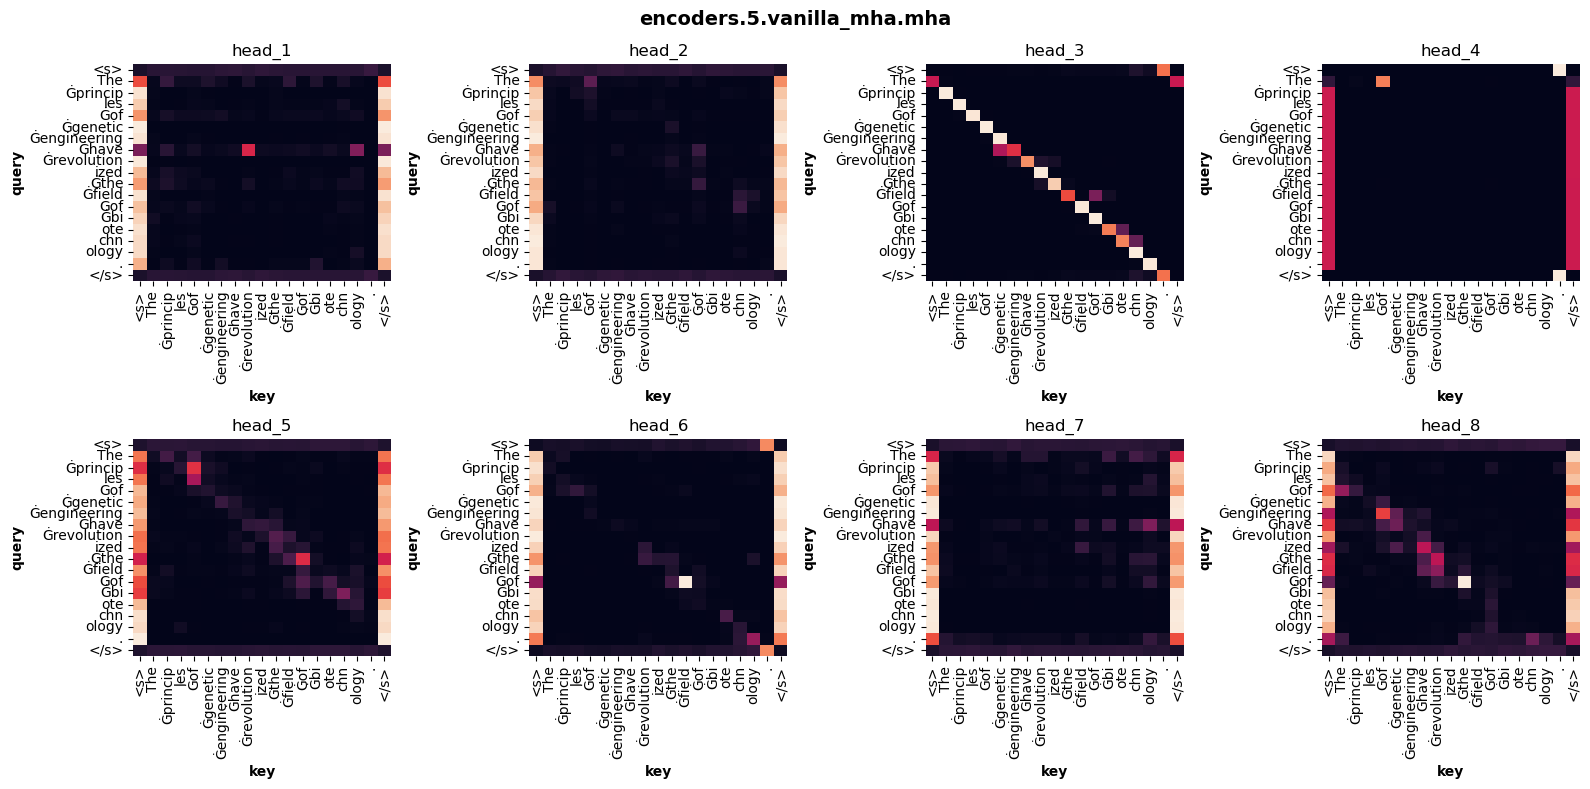

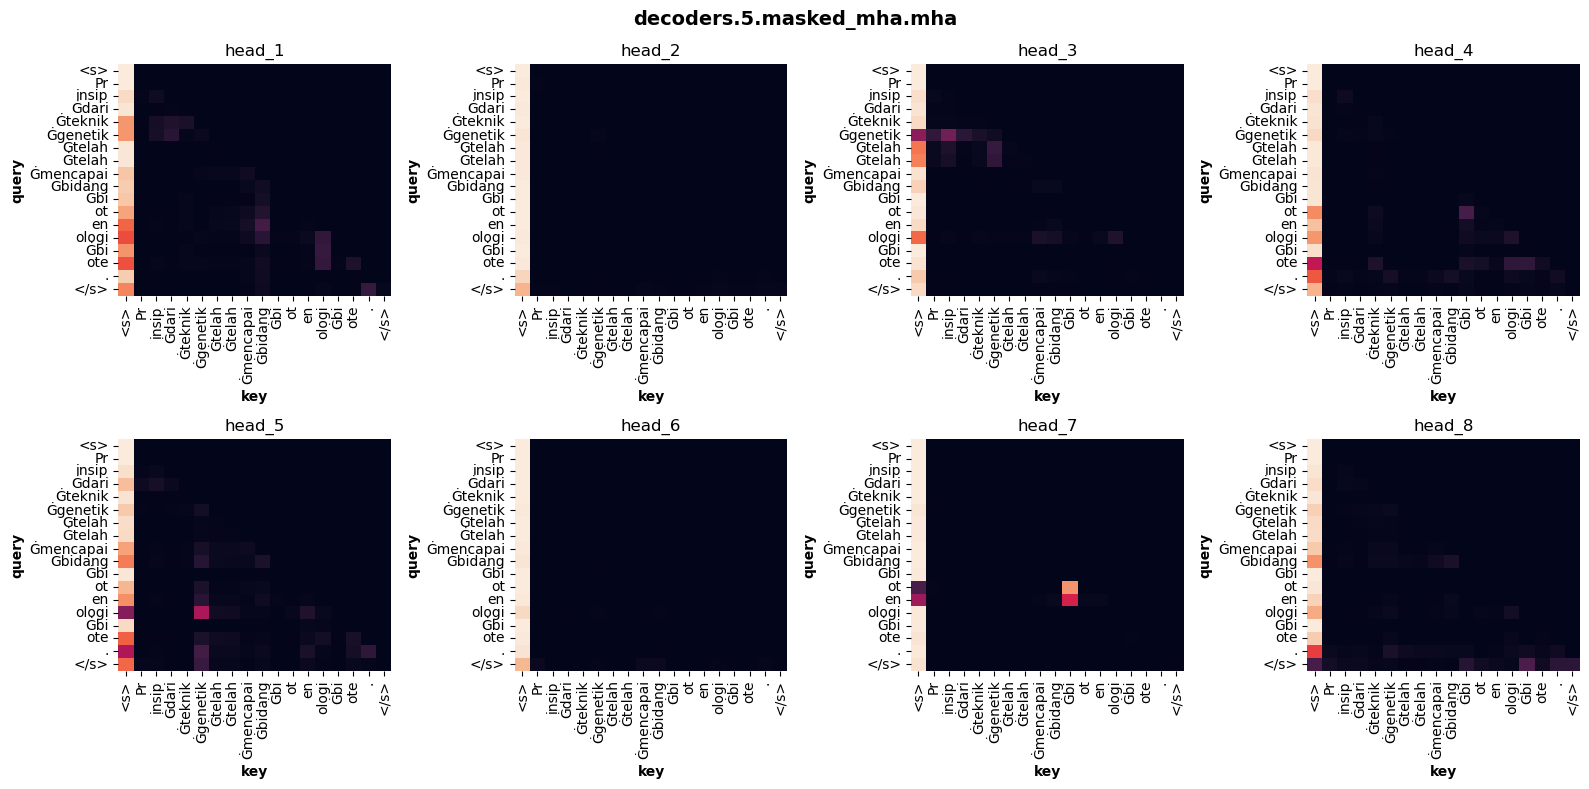

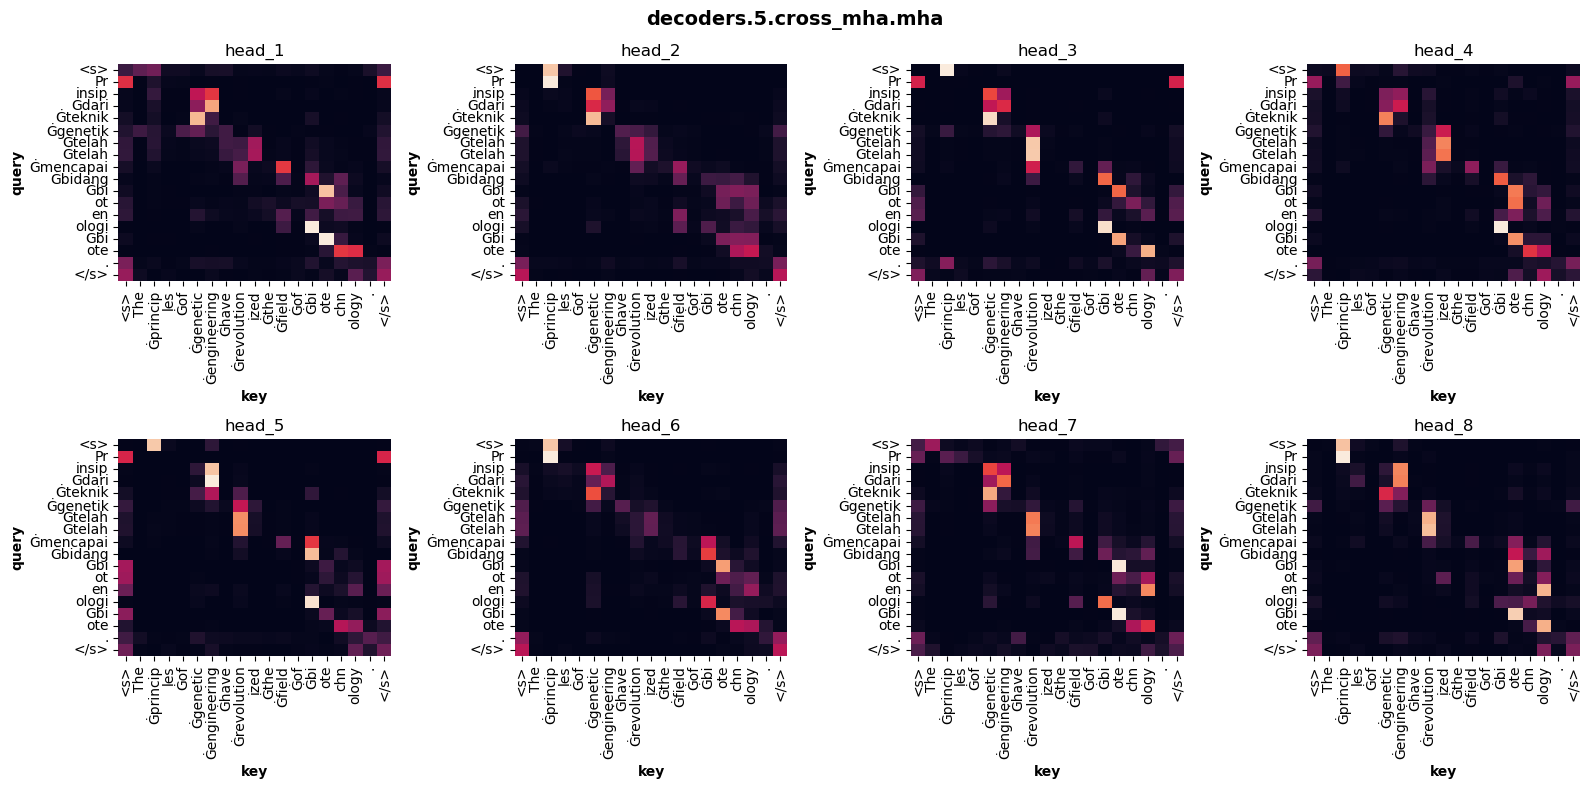

In [8]:
visualize_attn(
    model,
    tokenizer,
    en_txt="The principles of genetic engineering have revolutionized the field of biotechnology.",
    id_txt="Prinsip dari teknik genetik telah telah mencapai bidang biotenologi biote.",
    last_layer_only=True,  # set to False to see every attention heads
)